In [10]:
#New dataframe that looked at both race an class

import pandas as pd
import numpy  as np

# Plotting packages
import matplotlib.pyplot as plt
import seaborn           as sns
custom_style = {"axes.spines.right": False, "axes.spines.top": False,}
sns.set_style("ticks", rc=custom_style)
sns.set(style = 'whitegrid')

df = pd.read_csv('cleaned_data.csv')


In [11]:
# new variable name
new_df=df[['demo_race','demo_class']]

# Clean the race column by splitting it from strings to a list of string
new_df.loc[:, 'demo_race'] = new_df['demo_race'].str.split(', ')


In [12]:
# Explode the demo_race column in order to expand the datafram 
new_df = new_df.explode('demo_race')

# We are also resetting the index of the dataframe
new_df = new_df.reset_index(drop=True)


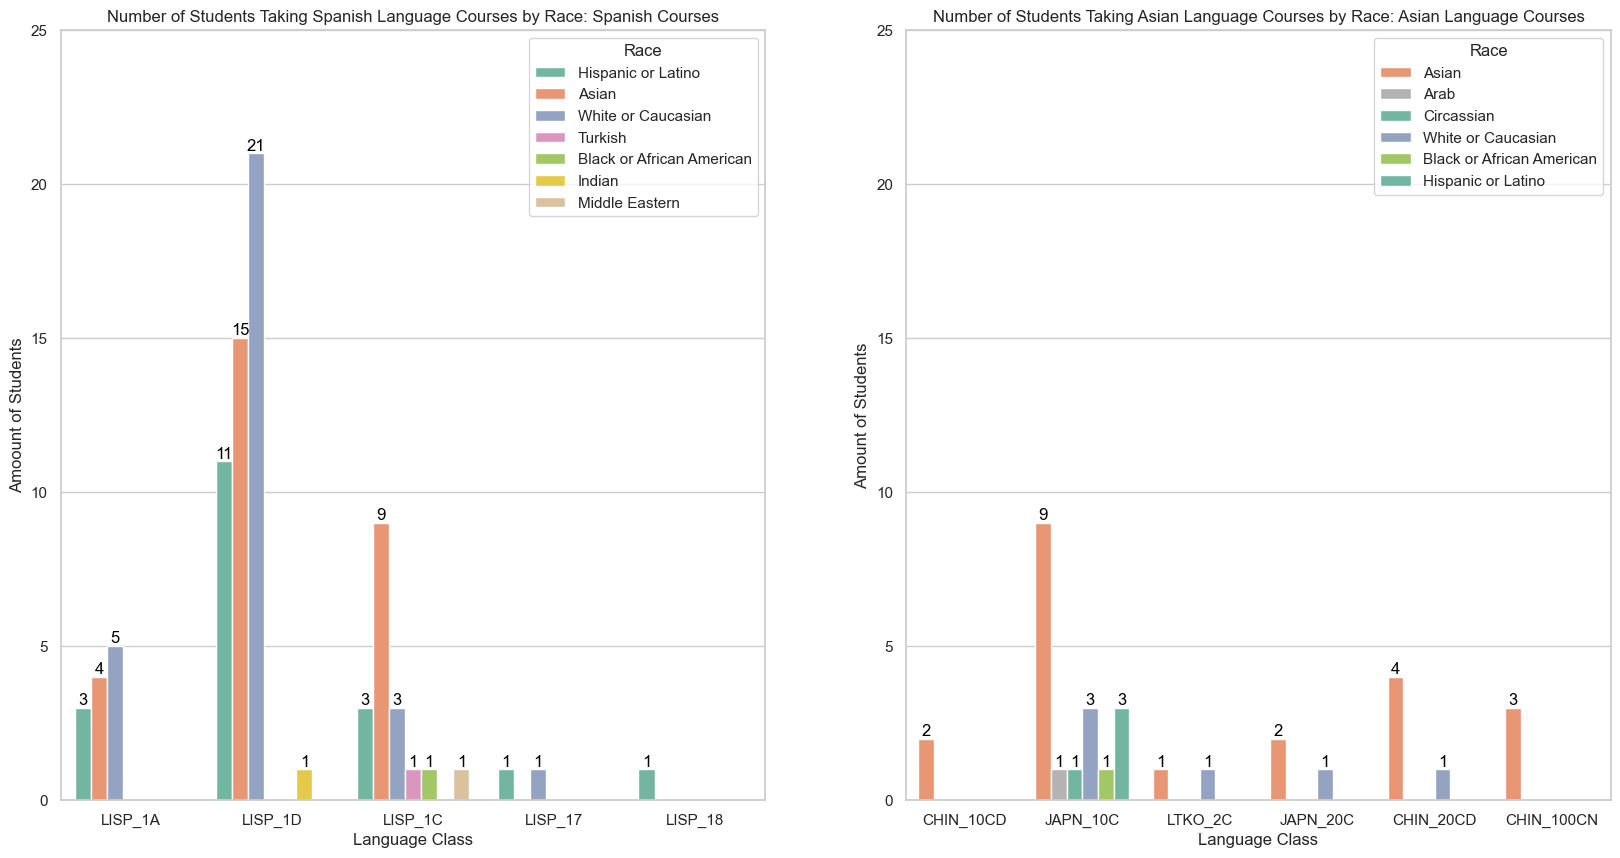

In [144]:
# Split the data ito two sets
subset1 = new_df[new_df['demo_class'].isin(['LISP_1A', 'LISP_1D', 'LISP_1C', 'LISP_17', 'LISP_18'])]
subset2 = new_df[new_df['demo_class'].isin(['CHIN_10CD', 'JAPN_10C', 'LTKO_2C', 'JAPN_20C', 'CHIN_20CD', 'CHIN_100CN'])]

# Define consistent colors for each value within the demo_race column for both subsets
modes = pd.concat([df['demo_race'] for df in [subset1, subset2]], ignore_index=True).unique()
colors = sns.color_palette('Set2', n_colors=len(modes))
palette = dict(zip(modes, colors))

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Create the first graph with the subset 1 data
sns.countplot(data=subset1, x='demo_class', hue='demo_race', palette=palette, ax=ax[0])
ax[0].set_title('Number of Students Taking Spanish Language Courses by Race: Spanish Courses')
ax[0].set_xlabel('Language Class')
ax[0].set_ylabel('Amoount of Students')
ax[0].legend(title='Race', loc='upper right')
ax[0].set_ylim(0, 25)
# Add labels to the bars
for c in ax[0].containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax[0].bar_label(c, labels=labels, label_type='edge', color='black')

# Create the second graph with subset 2 data
sns.countplot(data=subset2, x='demo_class', hue='demo_race', palette=palette, ax=ax[1])
ax[1].set_title('Number of Students Taking Asian Language Courses by Race: Asian Language Courses')
ax[1].set_xlabel('Language Class')
ax[1].set_ylabel('Amount of Students')
ax[1].legend(title='Race', loc='upper right')
ax[1].set_ylim(0, 25)
# Add labels to the bars
for c in ax[1].containers:
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax[1].bar_label(c, labels=labels, label_type='edge', color='black')


# The plot
plt.show()

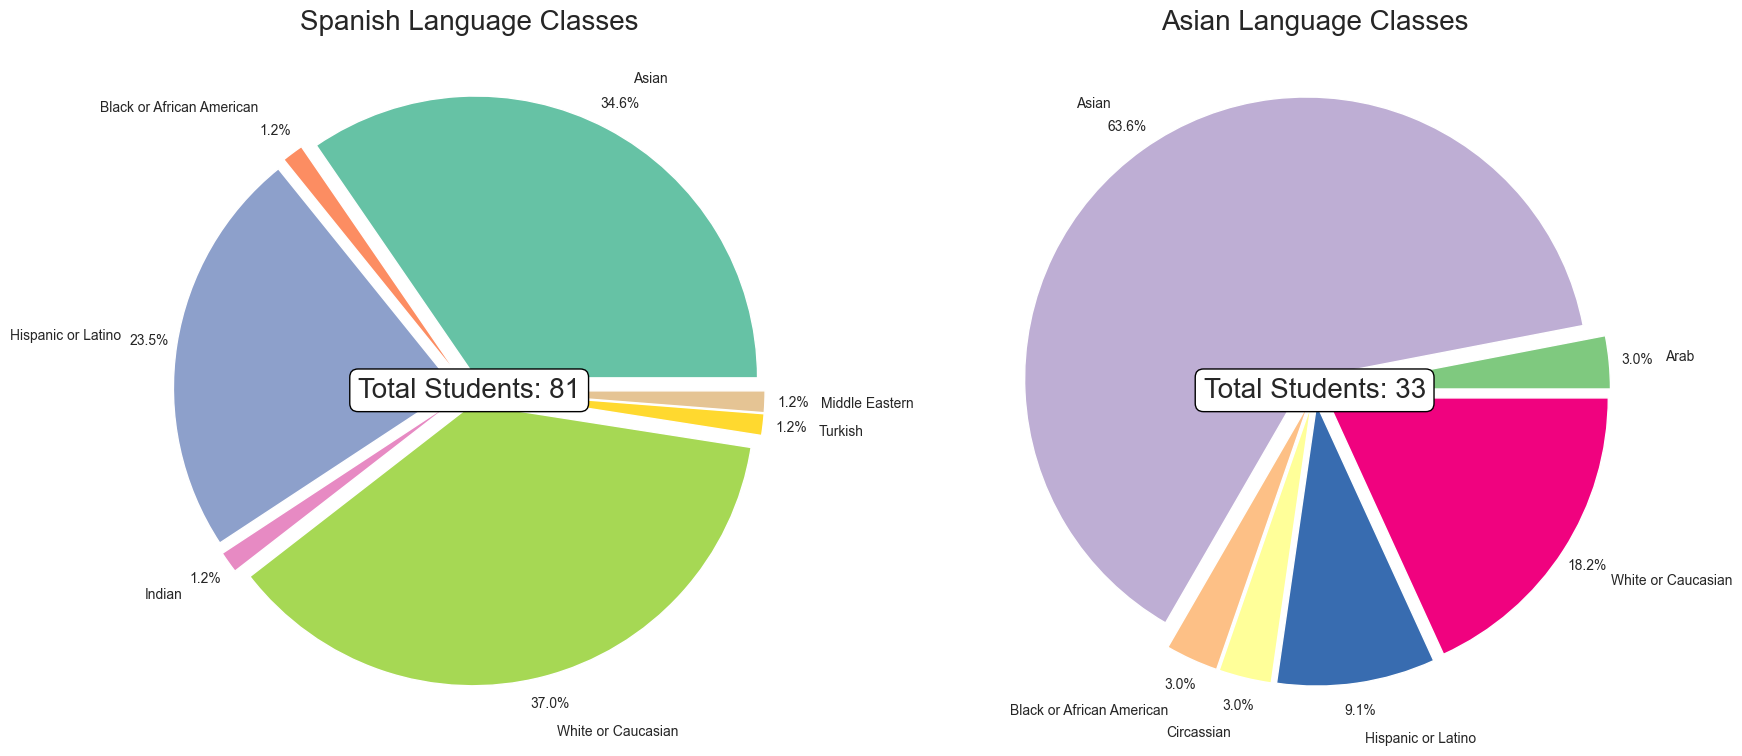

In [166]:
# Compute a pie chart for the first subset
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Compute the count of each race within the first subset
races1       = subset1['demo_race'].unique()
subset1_perc = subset1.value_counts()[races1]

races2       = subset2['demo_race'].unique()
subset2_perc = subset2.value_counts()[races2]

# Convert values to a dataframe
subset1_perc = pd.DataFrame(subset1_perc, columns=['count'])
subset2_perc = pd.DataFrame(subset2_perc, columns=['count'])
# Remove the 'demo_class' index
subset1_perc = subset1_perc.reset_index()
subset2_perc = subset2_perc.reset_index()
# Drop the 'demo_class' column
subset1_perc = subset1_perc.drop(columns=['demo_class'])
subset2_perc = subset2_perc.drop(columns=['demo_class'])
# Combine all like values within the demo_race into a single index
subset1_perc = subset1_perc.groupby('demo_race')['count'].sum().reset_index()
subset2_perc = subset2_perc.groupby('demo_race')['count'].sum().reset_index()
# Reorder the values within the demo_race
subset1_perc = subset1_perc.reindex([0, 1, 2, 3, 6, 5, 4])

# Create the pie chart
ax[0].pie(subset1_perc['count'], 
        labels=subset1_perc['demo_race'], 
        colors=colors, 
        autopct='%1.1f%%', 
        labeldistance=1.2, 
        pctdistance=1.1, 
        textprops={'fontsize': 10}, 
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

# Add an annotation which is the total number of students
ax[0].annotate('Total Students: ' + str(subset1_perc['count'].sum()), xy=(0.5, 0.5), xycoords='axes fraction', fontsize=20, ha='center', va='center', bbox=dict(boxstyle='round', fc='white', ec='black'))

ax[0].set_title('Spanish Language Classes', fontsize=20)

other_color = sns.color_palette('Accent')

ax[1].pie(subset2_perc['count'], 
        labels=subset2_perc['demo_race'], 
        colors=other_color, 
        autopct='%1.1f%%', 
        labeldistance=1.2, 
        pctdistance=1.1, 
        textprops={'fontsize': 10},
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
ax[1].set_title('Asian Language Classes', fontsize=20)

# Add an annotation which is the total number of students
ax[1].annotate('Total Students: ' + str(subset2_perc['count'].sum()), xy=(0.5, 0.5), xycoords='axes fraction', fontsize=20, ha='center', va='center', bbox=dict(boxstyle='round', fc='white', ec='black'))

plt.show()